<a href="https://colab.research.google.com/github/carolina-garay/AnalisisYCuracion_Grupo32/blob/carolina_Garay_AyC/AyC_Parte2__Garay_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 2
*Grupo 32*

Integrantes: 
- Garay, Carolina del Valle
- Ormaechea, Sebastián Gabriel
- Ramos, Pablo Nicolás

En el ejercicio 2 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad e imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.** que fue guardado en un archivo (Ejercicio 3 entregable 1). 


In [56]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 80 kB 6.1 MB/s 


In [57]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import files
import joblib 
from sklearn import preprocessing
from category_encoders import one_hot


import seaborn as sns
sns.set_context('talk')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [30]:
# Descarga de base de datos
!gdown https://drive.google.com/file/d/185RVTSVvOg4DjAuUhv9UTy_QKPS4e6bp/view?usp=sharing --fuzzy

Downloading...
From: https://drive.google.com/uc?id=185RVTSVvOg4DjAuUhv9UTy_QKPS4e6bp
To: /content/Merge_df.csv
100% 2.74M/2.74M [00:00<00:00, 215MB/s]


In [31]:
# Lectura de csv y obtención de dataframe 
airmelb_df=pd.read_csv('/content/Merge_df.csv')

## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


#**RESOLUCIÓN EJERCICIO 1**

1.1 Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

In [32]:
airmelb_df.head()

,Regionname,Suburb,Type,YearBuilt,BuildingArea,Car,Price,Postcode,Rooms,zipcode,AirB_record_count,AirB_daily_price_mean,AirB_weekly_price_mean,AirB_monthly_price_mean
0,Northern Metropolitan,Abbotsford,h,NaN,NaN,1.0,1480000.0,3067.0,2,3067.0,157.0,140.292994,236.250000,956.363636
1,Northern Metropolitan,Abbotsford,h,NaN,NaN,1.0,1480000.0,3067.0,2,3067.0,101.0,115.594059,735.352941,2863.900000
2,Northern Metropolitan,Abbotsford,h,1900.0,79.0,0.0,1035000.0,3067.0,2,3067.0,157.0,140.292994,236.250000,956.363636
3,Northern Metropolitan,Abbotsford,h,1900.0,79.0,0.0,1035000.0,3067.0,2,3067.0,101.0,115.594059,735.352941,2863.900000
4,Northern Metropolitan,Abbotsford,h,1900.0,150.0,0.0,1465000.0,3067.0,3,3067.0,157.0,140.292994,236.250000,956.363636


In [33]:
airmelb_df.columns

Index(['Regionname', 'Suburb', 'Type', 'YearBuilt', 'BuildingArea', 'Car',
       'Price', 'Postcode', 'Rooms', 'zipcode', 'AirB_record_count',
       'AirB_daily_price_mean', 'AirB_weekly_price_mean',
       'AirB_monthly_price_mean'],
      dtype='object')

In [67]:
#Selección de columnas
df= airmelb_df[['Regionname', 'Type','Car', 'Price', 'Postcode', 'Rooms',
       'zipcode', 'AirB_record_count', 'AirB_daily_price_mean',
       'AirB_weekly_price_mean', 'AirB_monthly_price_mean']]

In [68]:
df[:3]

,Regionname,Type,Car,Price,Postcode,Rooms,zipcode,AirB_record_count,AirB_daily_price_mean,AirB_weekly_price_mean,AirB_monthly_price_mean
0,Northern Metropolitan,h,1.0,1480000.0,3067.0,2,3067.0,157.0,140.292994,236.250000,956.363636
1,Northern Metropolitan,h,1.0,1480000.0,3067.0,2,3067.0,101.0,115.594059,735.352941,2863.900000
2,Northern Metropolitan,h,0.0,1035000.0,3067.0,2,3067.0,157.0,140.292994,236.250000,956.363636


In [36]:
df['Price'].describe().apply(lambda s: '{:.1f}'.format(s))

count      25740.0
mean     1037024.2
std       527260.9
min       210000.0
25%       650000.0
50%       902000.0
75%      1315000.0
max      2990000.0
Name: Price, dtype: object

In [37]:
df.select_dtypes(include=['float64', 'int']).describe()

,Car,Price,Postcode,Rooms,zipcode,AirB_record_count,AirB_daily_price_mean,AirB_weekly_price_mean,AirB_monthly_price_mean
count,25740.000000,2.574000e+04,25740.000000,25740.000000,25707.000000,25707.000000,25707.000000,13673.000000,13141.000000
mean,1.579254,1.037024e+06,3104.029876,2.908159,3103.584549,81.107792,134.512111,685.446882,2574.504864
std,0.918221,5.272609e+05,86.376050,0.946957,84.798453,149.922991,96.215809,338.678344,1450.177201
min,0.000000,2.100000e+05,3000.000000,1.000000,3000.000000,3.000000,41.764706,160.000000,600.000000
25%,1.000000,6.500000e+05,3044.000000,2.000000,3044.000000,20.000000,93.678571,441.916667,1550.000000
50%,2.000000,9.020000e+05,3084.000000,3.000000,3084.000000,40.000000,113.929204,606.750000,2224.600000
75%,2.000000,1.315000e+06,3148.000000,3.000000,3148.000000,81.000000,145.807692,896.055556,3366.666667
max,6.000000,2.990000e+06,3977.000000,10.000000,3977.000000,2491.000000,1407.666667,2236.666667,10060.000000



2.2 Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

La binarización (one-hot-encoding) consiste en crear nuevas variables dummy con cada uno de los niveles de las variables cualitativas. Por ejemplo, una variable llamada color que contenga los niveles rojo, verde y azul, se convertirá en tres nuevas variables (color_rojo, color_verde, color_azul), todas con el valor 0 excepto la que coincide con la observación, que toma el valor 1.

In [69]:
#Imprimimos tipo de dato de cada columna
df.dtypes

Regionname                  object
Type                        object
Car                        float64
Price                      float64
Postcode                   float64
Rooms                        int64
zipcode                    float64
AirB_record_count          float64
AirB_daily_price_mean      float64
AirB_weekly_price_mean     float64
AirB_monthly_price_mean    float64
dtype: object

In [70]:
#Imprimimos nombre de cada columna
df.columns

Index(['Regionname', 'Type', 'Car', 'Price', 'Postcode', 'Rooms', 'zipcode',
       'AirB_record_count', 'AirB_daily_price_mean', 'AirB_weekly_price_mean',
       'AirB_monthly_price_mean'],
      dtype='object')

In [71]:
#Separamos por variables categóricas y numéricas
categorical_cols = ['Regionname', 'Type']
numerical_cols = ['Car', 'Price', 'Postcode', 'Rooms',
       'zipcode', 'AirB_record_count', 'AirB_daily_price_mean',
       'AirB_weekly_price_mean', 'AirB_monthly_price_mean']

Inspeccionamos las variables categóricas

In [72]:
#Imprimimos cantidad de categorías que toma cada variable categórica
df[categorical_cols].nunique()

Regionname    8
Type          3
dtype: int64

In [75]:
#Imprimimos cantidad de valores que toma cada categoría de la variable Regionname
df.value_counts('Regionname')


Regionname
Southern Metropolitan         8918
Northern Metropolitan         7350
Western Metropolitan          5575
Eastern Metropolitan          2887
South-Eastern Metropolitan     831
Eastern Victoria                80
Western Victoria                51
Northern Victoria               48
dtype: int64

In [76]:
#Imprimimos cantidad de valores que toma cada categoría de la variable Suburb
#df.value_counts('Suburb')


In [44]:
#Imprimimos cantidad de valores que toma cada categoría de la variable Type
df.value_counts('Type')


Type
h    17596
u     5957
t     2187
dtype: int64

#Método :  Construir un vector One-Hot encoding



In [77]:
# Creación de instancias del objeto OHE de codificadores de categoría 
ce_ohe = one_hot.OneHotEncoder(use_cat_names = True)

In [78]:
ce_dummies = ce_ohe.fit_transform(df[categorical_cols])

In [79]:
ce_dummies

,Regionname_Northern Metropolitan,Regionname_Western Metropolitan,Regionname_Southern Metropolitan,Regionname_Eastern Metropolitan,Regionname_South-Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Victoria,Regionname_Western Victoria,Type_h,Type_u,Type_t
0,1,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
25735,0,1,0,0,0,0,0,0,1,0,0
25736,0,1,0,0,0,0,0,0,1,0,0
25737,0,1,0,0,0,0,0,0,1,0,0
25738,0,1,0,0,0,0,0,0,1,0,0


Usamos numpy.hstack para concatenar el resultado con las variables numéricas.

In [81]:
# Eliminamos las variables categóricas
df = df.drop(columns=['Regionname', 'Type'])


In [87]:
import numpy 

In [90]:
df_new = pd.concat([ce_dummies,df], axis = 1)

In [91]:
df_new

,Regionname_Northern Metropolitan,Regionname_Western Metropolitan,Regionname_Southern Metropolitan,Regionname_Eastern Metropolitan,Regionname_South-Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Victoria,Regionname_Western Victoria,Type_h,Type_u,Type_t,Car,Price,Postcode,Rooms,zipcode,AirB_record_count,AirB_daily_price_mean,AirB_weekly_price_mean,AirB_monthly_price_mean
0,1,0,0,0,0,0,0,0,1,0,0,1.0,1480000.0,3067.0,2,3067.0,157.0,140.292994,236.250000,956.363636
1,1,0,0,0,0,0,0,0,1,0,0,1.0,1480000.0,3067.0,2,3067.0,101.0,115.594059,735.352941,2863.900000
2,1,0,0,0,0,0,0,0,1,0,0,0.0,1035000.0,3067.0,2,3067.0,157.0,140.292994,236.250000,956.363636
3,1,0,0,0,0,0,0,0,1,0,0,0.0,1035000.0,3067.0,2,3067.0,101.0,115.594059,735.352941,2863.900000
4,1,0,0,0,0,0,0,0,1,0,0,0.0,1465000.0,3067.0,3,3067.0,157.0,140.292994,236.250000,956.363636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25735,0,1,0,0,0,0,0,0,1,0,0,4.0,1170000.0,3016.0,3,3016.0,20.0,167.200000,633.000000,2163.000000
25736,0,1,0,0,0,0,0,0,1,0,0,5.0,2500000.0,3016.0,4,3016.0,54.0,199.944444,550.000000,1990.000000
25737,0,1,0,0,0,0,0,0,1,0,0,5.0,2500000.0,3016.0,4,3016.0,20.0,167.200000,633.000000,2163.000000
25738,0,1,0,0,0,0,0,0,1,0,0,1.0,1285000.0,3013.0,4,3013.0,42.0,127.523810,NaN,NaN


## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

#**RESOLUCIÓN EJERCICIO 2**

2.1 Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.

In [92]:
df_ = airmelb_df[['YearBuilt','BuildingArea']]

In [93]:
# Añadimos el dataframe creado en el punto anterior a
#  df_ (dataframe que contenía las variables 'YearBuilt' y 'BuildingArea')
df_ = pd.concat([df_, df_new], axis = 1)

In [94]:
#Imprimimos dataframe unido
df_

,YearBuilt,BuildingArea,Regionname_Northern Metropolitan,Regionname_Western Metropolitan,Regionname_Southern Metropolitan,Regionname_Eastern Metropolitan,Regionname_South-Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Victoria,Regionname_Western Victoria,...,Type_t,Car,Price,Postcode,Rooms,zipcode,AirB_record_count,AirB_daily_price_mean,AirB_weekly_price_mean,AirB_monthly_price_mean
0,NaN,NaN,1,0,0,0,0,0,0,0,...,0,1.0,1480000.0,3067.0,2,3067.0,157.0,140.292994,236.250000,956.363636
1,NaN,NaN,1,0,0,0,0,0,0,0,...,0,1.0,1480000.0,3067.0,2,3067.0,101.0,115.594059,735.352941,2863.900000
2,1900.0,79.0,1,0,0,0,0,0,0,0,...,0,0.0,1035000.0,3067.0,2,3067.0,157.0,140.292994,236.250000,956.363636
3,1900.0,79.0,1,0,0,0,0,0,0,0,...,0,0.0,1035000.0,3067.0,2,3067.0,101.0,115.594059,735.352941,2863.900000
4,1900.0,150.0,1,0,0,0,0,0,0,0,...,0,0.0,1465000.0,3067.0,3,3067.0,157.0,140.292994,236.250000,956.363636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25735,1997.0,NaN,0,1,0,0,0,0,0,0,...,0,4.0,1170000.0,3016.0,3,3016.0,20.0,167.200000,633.000000,2163.000000
25736,1920.0,157.0,0,1,0,0,0,0,0,0,...,0,5.0,2500000.0,3016.0,4,3016.0,54.0,199.944444,550.000000,1990.000000
25737,1920.0,157.0,0,1,0,0,0,0,0,0,...,0,5.0,2500000.0,3016.0,4,3016.0,20.0,167.200000,633.000000,2163.000000
25738,1920.0,112.0,0,1,0,0,0,0,0,0,...,0,1.0,1285000.0,3013.0,4,3013.0,42.0,127.523810,NaN,NaN


2.2 Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?

In [95]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

melb_data_mice = df_.copy(deep=True)

mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
melb_data_mice[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(
    melb_data_mice[['YearBuilt', 'BuildingArea']])

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [106]:
melb_data_mice[:10]

,YearBuilt,BuildingArea,Regionname_Northern Metropolitan,Regionname_Western Metropolitan,Regionname_Southern Metropolitan,Regionname_Eastern Metropolitan,Regionname_South-Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Victoria,Regionname_Western Victoria,...,Type_t,Car,Price,Postcode,Rooms,zipcode,AirB_record_count,AirB_daily_price_mean,AirB_weekly_price_mean,AirB_monthly_price_mean
0,1974.0,166.6,1,0,0,0,0,0,0,0,...,0,1.0,1480000.0,3067.0,2,3067.0,157.0,140.292994,236.250000,956.363636
1,1974.0,166.6,1,0,0,0,0,0,0,0,...,0,1.0,1480000.0,3067.0,2,3067.0,101.0,115.594059,735.352941,2863.900000
2,1900.0,79.0,1,0,0,0,0,0,0,0,...,0,0.0,1035000.0,3067.0,2,3067.0,157.0,140.292994,236.250000,956.363636
3,1900.0,79.0,1,0,0,0,0,0,0,0,...,0,0.0,1035000.0,3067.0,2,3067.0,101.0,115.594059,735.352941,2863.900000
4,1900.0,150.0,1,0,0,0,0,0,0,0,...,0,0.0,1465000.0,3067.0,3,3067.0,157.0,140.292994,236.250000,956.363636
5,1900.0,150.0,1,0,0,0,0,0,0,0,...,0,0.0,1465000.0,3067.0,3,3067.0,101.0,115.594059,735.352941,2863.900000
6,1974.0,166.6,1,0,0,0,0,0,0,0,...,0,1.0,850000.0,3067.0,3,3067.0,157.0,140.292994,236.250000,956.363636
7,1974.0,166.6,1,0,0,0,0,0,0,0,...,0,1.0,850000.0,3067.0,3,3067.0,101.0,115.594059,735.352941,2863.900000
8,2014.0,142.0,1,0,0,0,0,0,0,0,...,0,2.0,1600000.0,3067.0,4,3067.0,157.0,140.292994,236.250000,956.363636
9,2014.0,142.0,1,0,0,0,0,0,0,0,...,0,2.0,1600000.0,3067.0,4,3067.0,101.0,115.594059,735.352941,2863.900000


Ejemplo de gráfico comparando las distribuciones de datos obtenidas con cada método de imputación.

In [100]:
mice_year_built = melb_data_mice.YearBuilt.to_frame()

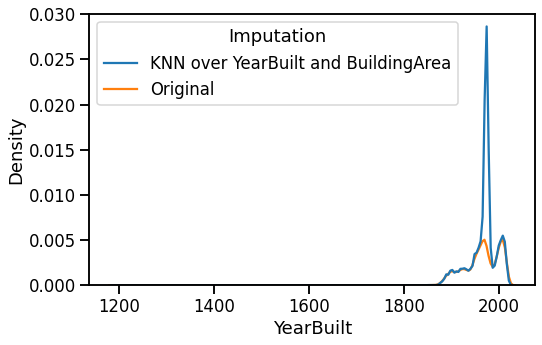

In [103]:
mice_year_built = melb_data_mice.YearBuilt.to_frame()
mice_year_built['Imputation'] = 'KNN over YearBuilt and BuildingArea'
melb_year_build = df_.YearBuilt.dropna().to_frame()
melb_year_build['Imputation'] = 'Original'
data = pd.concat([mice_year_built, melb_year_build], ignore_index=True)
fig = plt.figure(figsize=(8, 5))
g = sns.kdeplot(data=data, x='YearBuilt', hue='Imputation')

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [ ]:
## Small example
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

## If we process our data with the following steps:
categorical_cols = ['Type', 'Regionname']
numerical_cols = ['Rooms', 'Distance']
new_columns = []

# Step 1: encode categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_cat = encoder.fit_transform(melb_df[categorical_cols])
for col, col_values in zip(categorical_cols, encoder.categories_):
  for col_value in col_values:
    new_columns.append('{}={}'.format(col, col_value))
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# Step 2: Append the numerical columns
X = numpy.hstack([X_cat, melb_df[numerical_cols].values])
new_columns.extend(numerical_cols)
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# Step 3: Append some new features, like PCA
pca = PCA(n_components=2)
pca_dummy_features = pca.fit_transform(X)
X_pca = numpy.hstack([X, pca_dummy_features])
new_columns.extend(['pca1', 'pca2'])

## Re-build dataframe
processed_melb_df = pandas.DataFrame(data=X_pca, columns=new_columns)
processed_melb_df.head()

Matrix has shape (13580, 11), with columns: ['Type=h', 'Type=t', 'Type=u', 'Regionname=Eastern Metropolitan', 'Regionname=Eastern Victoria', 'Regionname=Northern Metropolitan', 'Regionname=Northern Victoria', 'Regionname=South-Eastern Metropolitan', 'Regionname=Southern Metropolitan', 'Regionname=Western Metropolitan', 'Regionname=Western Victoria']
Matrix has shape (13580, 11), with columns: ['Type=h', 'Type=t', 'Type=u', 'Regionname=Eastern Metropolitan', 'Regionname=Eastern Victoria', 'Regionname=Northern Metropolitan', 'Regionname=Northern Victoria', 'Regionname=South-Eastern Metropolitan', 'Regionname=Southern Metropolitan', 'Regionname=Western Metropolitan', 'Regionname=Western Victoria', 'Rooms', 'Distance']


,Type=h,Type=t,Type=u,Regionname=Eastern Metropolitan,Regionname=Eastern Victoria,Regionname=Northern Metropolitan,Regionname=Northern Victoria,Regionname=South-Eastern Metropolitan,Regionname=Southern Metropolitan,Regionname=Western Metropolitan,Regionname=Western Victoria,Rooms,Distance,pca1,pca2
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.5,-7.669418,-0.292703
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.5,-7.669418,-0.292703
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.5,-7.620201,0.619633
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.5,-7.620201,0.619633
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,2.5,-7.570984,1.531969


## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```
